In [19]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

from sklearn.svm import SVC

In [5]:
iris = datasets.load_iris()
X = iris["data"][:, (2,3)]
y = (iris["target"] == 2)

In [6]:
svm_clf = Pipeline([
    ("scaller", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

svm_clf.fit(X,y)

Pipeline(steps=[('scaller', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [7]:
svm_clf.predict([[5.5, 1.7]])

array([ True])

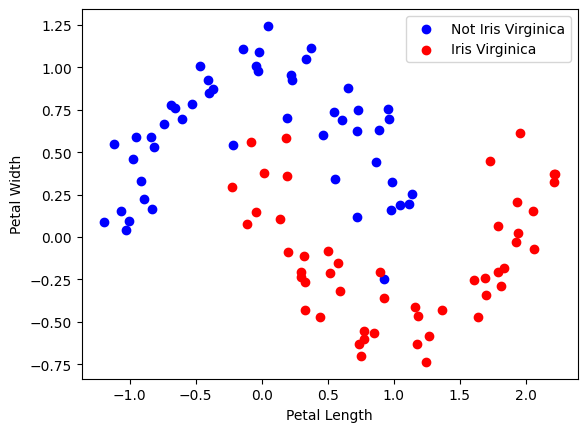

In [18]:
# Plot the data points
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], c='b', label="Not Iris Virginica")
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], c='r', label="Iris Virginica")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.show()

In [8]:
### NonLinear SVM Classification

In [11]:
X, y = make_moons(n_samples=100, noise=0.15)
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaller", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge")),
])
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaller', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [12]:
# Create a meshgrid of points over the range of the data
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))


In [13]:
# Predict the class of each point in the meshgrid
Z = polynomial_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

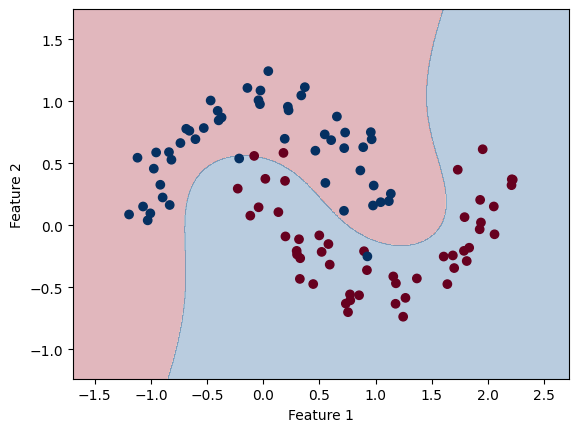

In [16]:
# Plot the decision boundary and data points
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu_r)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [17]:
### Polinomial Kernel

In [22]:
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [25]:
poly_kernel_svm_clf.predict([[5.5, 1.7]])

array([1])

In [26]:
# Create a meshgrid of points over the range of the data
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))


In [27]:
# Predict the class of each point in the meshgrid
Z = poly_kernel_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

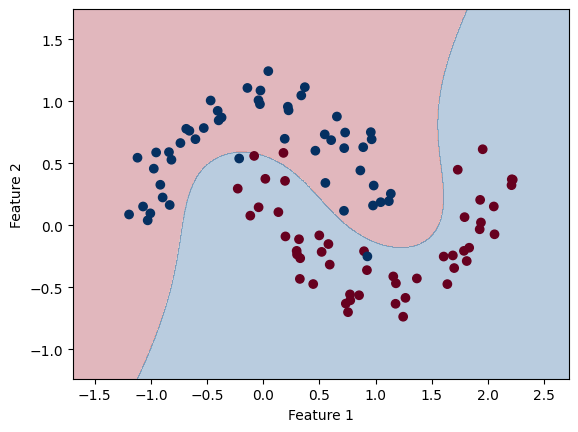

In [28]:
# Plot the prediction as a contour plot
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu_r)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [29]:
### Gaussian RBF Kernel

In [30]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

In [32]:
rbf_kernel_svm_clf.predict([[5.5, 1.7]])

array([1])

In [33]:
# Create a meshgrid of points over the range of the data
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))


In [34]:
# Predict the class of each point in the meshgrid
Z = rbf_kernel_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

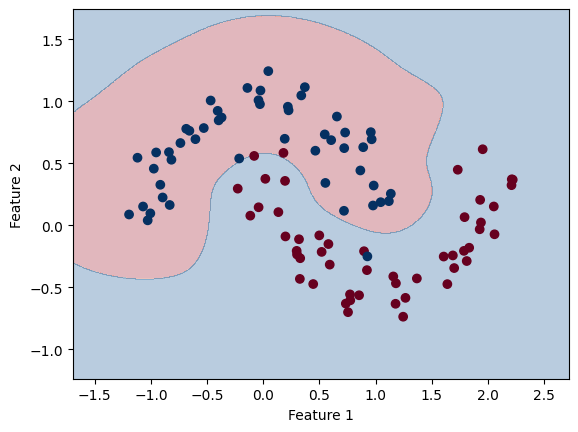

In [35]:
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu_r)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()